# Artificial Training Dataset Make 5 Circles

## Used to create truly pentamodal (5 modes) output to test multimodality of colorization model

This program draws 5 circles in an image.
Each circle has a random location and size. 
Every circle color has the same lightness value in LAB.

In [2]:
import numpy as np
import random
import turtle
import matplotlib.pyplot as plt
from tqdm import tnrange
import cv2

# Generate Colors
## Test that they have the same L value in LAB

r: 255 g: 0 b: 124
l: 140 a: 212 b: 134


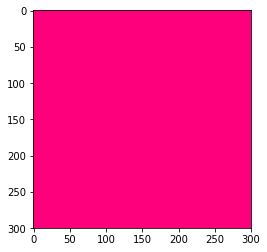

In [2]:
pink = (255/255, 0/255, 124.24968629243119/255)
square = (np.zeros((300,300,3)) + pink)
plt.imshow(square)
plt.savefig("test.png", color="rgb")
img = cv2.imread("test.png")

b, g, r = img[250,250,:]
print("r:", r, "g:", g, "b:", b)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[250,250,:]
print("l:", l, "a:", a, "b:", b)

r: 0 g: 153 b: 0
l: 140 a: 69 b: 185


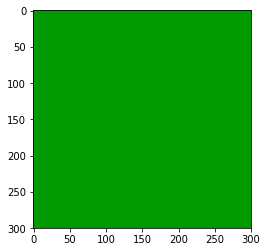

In [3]:
green = (0/255, 153/255, 0/255)
square = (np.zeros((300,300,3)) + green)
plt.imshow(square)
plt.savefig("test.png", color="rgb")
img = cv2.imread("test.png")

b, g, r = img[250,250,:]
print("r:", r, "g:", g, "b:", b)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[250,250,:]
print("l:", l, "a:", a, "b:", b)

r: 100 g: 118 b: 255
l: 140 a: 162 b: 58


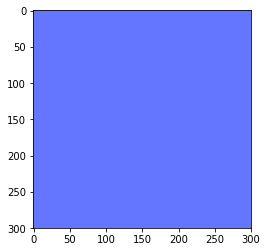

In [4]:
blue = (100/255, 118/255, 255/255)
square = (np.zeros((300,300,3)) + blue)
plt.imshow(square)
plt.savefig("test.png", color="rgb")
img = cv2.imread("test.png")

b, g, r = img[250,250,:]
print("r:", r, "g:", g, "b:", b)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[250,250,:]
print("l:", l, "a:", a, "b:", b)

r: 255 g: 35 b: 50
l: 140 a: 205 b: 178


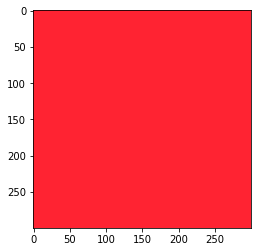

In [16]:
red = (255 / 255, 35/255, 50/255)
square = (np.zeros((300,300,3)) + red)
plt.imshow(square)
plt.savefig("test.png", color="rgb")
img = cv2.imread("test.png")

b, g, r = img[250,250,:]
print("r:", r, "g:", g, "b:", b)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[250,250,:]
print("l:", l, "a:", a, "b:", b)

r: 150 g: 115 b: 200
l: 140 a: 159 b: 89


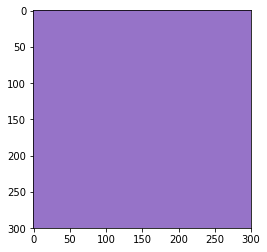

In [5]:
purple = (150/255, 115/255, 200/255)
square = (np.zeros((300,300,3)) + purple)
plt.imshow(square)
plt.savefig("test.png", color="rgb")
img = cv2.imread("test.png")

b, g, r = img[250,250,:]
print("r:", r, "g:", g, "b:", b)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[250,250,:]
print("l:", l, "a:", a, "b:", b)

r: 225 g: 87 b: 0
l: 140 a: 179 b: 192


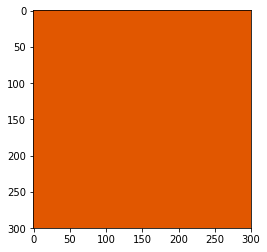

In [6]:
orange = (225/255, 87/255, 0/255)
square = (np.zeros((300,300,3)) + orange)
plt.imshow(square)
plt.savefig("test.png", color="rgb")
img = cv2.imread("test.png")

b, g, r = img[250,250,:]
print("r:", r, "g:", g, "b:", b)

lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = lab_img[250,250,:]
print("l:", l, "a:", a, "b:", b)

# Generate Circles

In [7]:
def make_random_circles_5_colors(num_circle_pairs, save_dir):
    for i in tnrange(num_circle_pairs, desc="Generating Circle Pairs"):
        colors = [pink, green, blue, purple, orange]
        random.shuffle(colors)

        fig, ax = plt.subplots()
        fig.set_size_inches(1, 1)

        # Create 1-5 circles
        num_circles = random.randint(1,5)

        # Create 1-5 radii
        radii = []
        for x in range(num_circles):
            radii.append((random.random() + .5) / 6)

        # Hopefully small circles placed on top of big circles instead of the other way around
        radii = sorted(radii, reverse=True)

        # Place the circles, assign one of the possible colors
        for radius in radii:
            x, y = random.random(), random.random()

            border = plt.Circle((x, y), radius+.02, color="black")
            fill = plt.Circle((x, y), radius, color=colors.pop())

            ax.add_artist(border)
            ax.add_artist(fill)

        plt.axis("off")

        plt.savefig(save_dir + str(i) + ".jpg", dpi=256)

        plt.close()

In [8]:
# Make training data
make_random_circles_5_colors(200, "new_circles/train/")

In [9]:
# Make testing data
make_random_circles_5_colors(20, "new_circles/test/")

# Ensure images created successfully

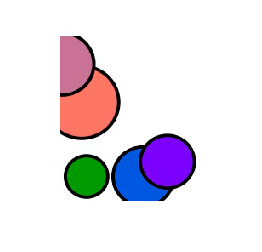

In [10]:
# G and R reversed because cv2 hates me specifically
img = cv2.imread("new_circles/train/0.jpg")
plt.axis("off")
plt.imshow(img)
